# CS-UY4536 Final Project: Predicting SP500 Monthly Price Shifts
Done by Matthew Swartz and Sasha Agapiev for 12/8/21
---



# Importing Libraries

In [51]:
import numpy as np
import pandas as pd

# Import Logistic Regression libraries
import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 

# Import plotting libraries 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [52]:
names =[
    'DATE', 'PRICE', 'DIVIDEND', 'EARNINGS', 'CPI', 'LIR', 
    'RP',  'RD', 'RE', 'PE10', 'MPC'
]

# read in our S&P data
df = pd.read_csv('data_csv.csv', header=0, names=names, na_values='?')
# remove na values
df = df.dropna()
# encode monthly percent change where positive month = 1, negative month = 0
df['MPC'] = np.where((df.MPC)>=0,1,0)

# checking data
df.head(6)
# print(df.shape)
# num_samples = df.shape[0]
# num_attributes = df.shape[1]
# print(num_samples, num_attributes)

,DATE,PRICE,DIVIDEND,EARNINGS,CPI,LIR,RP,RD,RE,PE10,MPC
0,1/1/90,339.97,11.14,22.49,127.4,8.21,666.69,21.85,44.10,17.05,0
1,2/1/90,330.45,11.23,22.08,128.0,8.47,644.99,21.92,43.10,16.51,1
2,3/1/90,338.46,11.32,21.67,128.7,8.59,657.03,21.97,42.07,16.83,0
3,4/1/90,338.18,11.44,21.53,128.9,8.79,655.46,22.17,41.74,16.81,1
4,5/1/90,350.25,11.55,21.40,129.2,8.76,677.28,22.34,41.38,17.39,1
5,6/1/90,360.39,11.66,21.26,129.9,8.48,693.13,22.43,40.89,17.82,0


# SUPERVISED ANALYSIS PART 1: Logistic Regression

In [53]:
# Editing dataframe to get our feature and target array 

# Convert the df data frame into a numpy array named df2
df2 = df.to_numpy()
# Select all rows and first 11 columns as X from df2
X = df2[:, 1:10]
# Select all rows and monthly percent change column as target
Y = df2[:, 10:]
# added to flatten y as I was getting an error message
Y = np.ravel(Y)
Y = Y.astype('int')


In [54]:
# Using built-in preprocessing function to scale the X data 
X_scale = preprocessing.scale(X)

In [55]:
# Splitting the dataset into training and test data
# 336 training examples, and we decided on a 75/25 split for training and testing
X_train = X_scale[:252]
Y_train = Y[:252]
X_test = X_scale[252:]
Y_test = Y[252:]


In [56]:
# Standard Logistic Regression 

# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []
# Initialize an empty list to store different values of parameter 'iter'.
iteration_values = []

# This function creates a standard logreg model using sklearn's linear_model module
# The code in standard_logreg_model is inspired by code from previous homework assignments
# It takes, as arguments: iter(desired number of max_iterations), X_train (training data features), Y_train (training data targets)
#     X_test (testing data features), Y_test (testing data targets)
def standard_logreg_model(iter , X_train, Y_train, X_test, Y_test):
    # Create the Logistic Regression model object with no penalty 
    # NOTE: Since there's no regularization in the standard logistic regression, the c values are insignificant
    logreg = linear_model.LogisticRegression(penalty='none', solver='saga', max_iter=iter)
    
    # Fit the model on the training set
    logreg.fit(X_train, Y_train)
    
    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    iteration_values.append(iter)


In [57]:
# running our Standard Logistic Regression with various iterations
iters = [100, 500, 1000, 10000, 25000, 50000]

# re-initialize the Regressionlists to clear old data
acc_train_logreg = [] 
acc_test_logreg = []
iteration_values = []

for iter in iters:
    standard_logreg_model(iter, X_train, Y_train, X_test, Y_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Accuracy on training data = 0.642857
Accuracy on test data = 0.452381
Accuracy on training data = 0.650794
Accuracy on test data = 0.404762
Accuracy on training data = 0.666667
Accuracy on test data = 0.392857
Accuracy on training data = 0.654762
Accuracy on test data = 0.357143
Accuracy on training data = 0.654762
Accuracy on test data = 0.357143
Accuracy on training data = 0.654762
Accuracy on test data = 0.357143


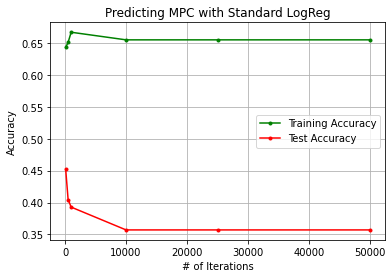

In [58]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(iteration_values, acc_train_logreg, '.-', color='green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(iteration_values, acc_test_logreg, '.-', color='red')

plt.xlabel('# of Iterations')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with Standard LogReg')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)

# Logistic Regression with L1 Regularization

In [59]:
# 
# Logistic Regression using Lasso (L1) Regularization
# 

# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

# This function creates an L1 logreg model using sklearn's linear_model module
# The code in logreg_model is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization), X_train (training data features), Y_train (training data targets)
#     X_test (testing data features), Y_test (testing data targets)
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create the Logistic Regression model object with L1 Regularization
    logreg = linear_model.LogisticRegression(penalty='l1',C=c,solver='saga',max_iter=10000)
    
    # Fit the model on the training set
    logreg.fit(X_train, Y_train)
    
    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg.append(c)


In [60]:
# running our L1 regularization with various c values
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# re-initialize the lists to clear old data
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)



Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.619048
Accuracy on test data = 0.595238
Accuracy on training data = 0.638889
Accuracy on test data = 0.452381


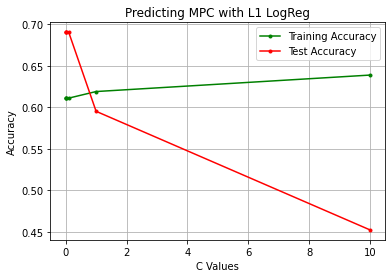

In [61]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, '.-', color='green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_test_logreg, '.-', color='red')

plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with L1 LogReg')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)



# Logistic Regression with L2 Regularization



In [62]:
# 
# Logistic Regression using Ridge (L2) Regularization
#

# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []
# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

# This function creates an L2 logreg model using sklearn's linear_model module
# The code in logreg2_model is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization), X_train (training data features), Y_train (training data targets)
#     X_test (testing data features), Y_test (testing data targets)
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    # Create the Logistic Regression model object with L2 Regularization
    logreg2 = linear_model.LogisticRegression(penalty='l2',C=c,solver='saga',max_iter=10000)
    
    # Fit the model on the training set
    logreg2.fit(X_train, Y_train)
    
    # Find the prediction on training set
    Yhat_train = logreg2.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set
    Yhat_test = logreg2.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg2.append(c)
    

In [63]:
# running our L2 regularization with various c values
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# re-initialize the lists to clear old data
acc_train_logreg2 = [] 
acc_test_logreg2 = []
c_logreg2 = []

for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)


Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.599206
Accuracy on test data = 0.583333
Accuracy on training data = 0.626984
Accuracy on test data = 0.547619
Accuracy on training data = 0.638889
Accuracy on test data = 0.476190


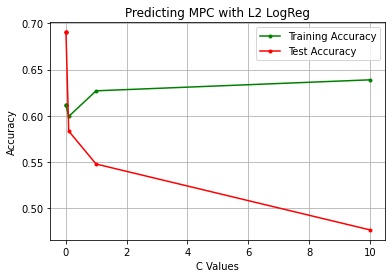

In [64]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_train_logreg2, '.-', color = 'green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_test_logreg2, '.-', color = 'red')

plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with L2 LogReg')

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)



# Logistic Regression Using Polynomial Feature Transformation


In [65]:
# 
# Logistic Regression with a Polynomial Feature Transformation
#

# Create an object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.619048
Accuracy on test data = 0.690476
Accuracy on training data = 0.674603
Accuracy on test data = 0.380952
Accuracy on training data = 0.670635
Accuracy on test data = 0.559524


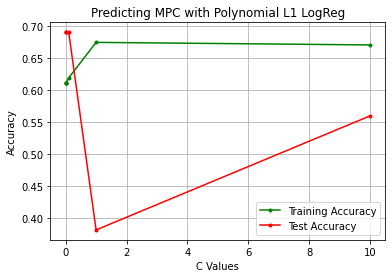

In [67]:
# L1 Regularization with Polynomial Feature Transform
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# Running the L1 logreg model function with the transformed data
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, '.-', color = 'green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_test_logreg, '.-', color = 'red')
# Use the code that you wrote to draw the plot for logreg_model()
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with Polynomial L1 LogReg')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)


Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.615079
Accuracy on test data = 0.690476
Accuracy on training data = 0.662698
Accuracy on test data = 0.369048
Accuracy on training data = 0.678571
Accuracy on test data = 0.404762
Accuracy on training data = 0.686508
Accuracy on test data = 0.654762


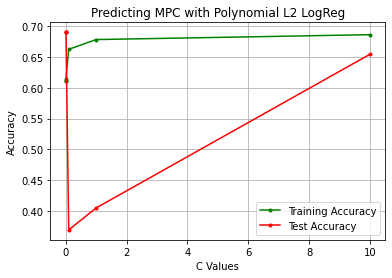

In [68]:
# L2 Regularization with Polynomial Feature Transform
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

# Running the L2 logreg function with the transformed data
for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_train_logreg2, '.-', color = 'green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_test_logreg2, '.-', color = 'red')
# Use the code that you wrote to draw the plot for logreg_model()
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with Polynomial L2 LogReg')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)

# SUPERVISED ANALYSIS PART 2: Support Vector Machines

# SVM With Linear Kernel 

In [69]:
# We are using sklearn's built-in SVM tool to create our SVM models
from sklearn import svm
# Initialize an empty list to store values of training set accuracy
acc_train_svm_linear = [] 
# Initialize an empty list to store values of test set accuracy
acc_test_svm_linear = []
# Initialize an empty list to store different values of parameter 'c'.
c_svm_linear = []

# This function creates a linear SVM model using sklearn's SVM module
# The code in svm_linear is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization)
def svm_linear(c):
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)

    svc_linear.fit(X_train, Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)

Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.666667
Train Accuracy = 0.646825
Test Accuracy = 0.511905


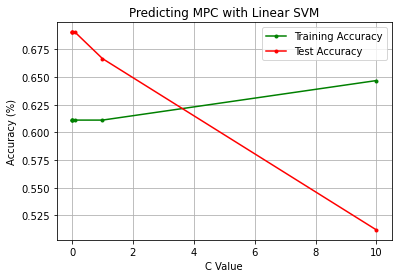

In [72]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

# Running the linear SVM function with various c values
for c in cVals:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear, '.-', color = 'green')
plt.plot(c_svm_linear, acc_test_svm_linear, '.-', color = 'red')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with Linear SVM")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# SVM With Radial Basis Function (RBF) Kernel

Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.674603
Test Accuracy = 0.690476
Train Accuracy = 0.678571
Test Accuracy = 0.654762


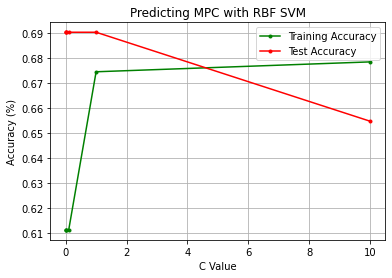

In [74]:
# Initialize an empty list to store values of training set accuracy
acc_train_svm_rbf = []
# Initialize an empty list to store values of test set accuracy
acc_test_svm_rbf = []
# Initialize an empty list to store different values of parameter 'c'
c_svm_rbf = []

# This function creates an RBF SVM model using sklearn's SVM module
# The code in svm_rbf is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization)
def svm_rbf(c):
    svc_rbf = svm.SVC(probability=False, kernel='rbf', C=c)
      
    svc_rbf.fit(X_train, Y_train)

    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = np.mean(Yhat_svc_rbf_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = np.mean(Yhat_svc_rbf_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)
  
# Running svm_rbf with various c values
for c in cVals:
    svm_rbf(c)

# Plotting the accuracies vs the various c values
plt.plot(c_svm_rbf, acc_train_svm_rbf, '.-', color = 'green')
plt.plot(c_svm_rbf, acc_test_svm_rbf, '.-', color = 'red')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with RBF SVM")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()


# SVM with Polynomial Kernel

Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.626984
Test Accuracy = 0.690476
Train Accuracy = 0.634921
Test Accuracy = 0.690476
Train Accuracy = 0.682540
Test Accuracy = 0.535714
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.626984
Test Accuracy = 0.690476
Train Accuracy = 0.634921
Test Accuracy = 0.690476
Train Accuracy = 0.682540
Test Accuracy = 0.535714


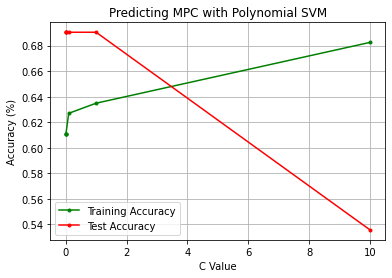

In [77]:
# Initialize an empty list to store values of training set accuracy
acc_train_svm_poly = []
# Initialize an empty list to store values of test set accuracy
acc_test_svm_poly = []
# Initialize an empty list to store different values of parameter 'c'
c_svm_poly = []

# This function creates a Polynomial SVM model using sklearn's SVM module
# The code in svm_polynomial is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization)
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability=False, kernel='poly', C=c)
    
    svc_polynomial.fit(X_train, Y_train)

    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = np.mean(Yhat_svc_poly_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = np.mean(Yhat_svc_poly_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)
  
# Running svm_polynomial with various c values
for c in cVals:
    svm_polynomial(c)

# Re-initializing the lists to clear old data 
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
for c in cVals:
    svm_polynomial(c)
plt.plot(c_svm_poly, acc_train_svm_poly, '.-', color = 'green')
plt.plot(c_svm_poly, acc_test_svm_poly, '.-', color = 'red')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with Polynomial SVM")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()